In [1]:
from pathlib import Path
from dysh.util.download import from_url
from dysh.fits.gbtfitsload import GBTFITSLoad

In [2]:
url = "http://www.gb.nrao.edu/dysh/example_data/positionswitch/data/AGBT05B_047_01/AGBT05B_047_01.raw.acs/AGBT05B_047_01.raw.acs.fits"
savepath = Path.cwd() / "data"
filename = from_url(url, savepath)

Starting download...
AGBT05B_047_01.raw.acs.fits already downloaded at /users/esmith/Git/dysh/notebooks/examples/data


In [3]:
sdfits = GBTFITSLoad(filename)

In [4]:
sdfits.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,51,NGC5291,4386.0,OnOff,1,1.420405,1.420405,1,2,11,1,198.343112,18.64274
1,52,NGC5291,4386.0,OnOff,2,1.420405,1.420405,1,2,11,1,198.930571,18.787219
2,53,NGC5291,4386.0,OnOff,1,1.420405,1.420405,1,2,11,1,199.330491,18.356075
3,54,NGC5291,4386.0,OnOff,2,1.420405,1.420405,1,2,11,1,199.915725,18.492742
4,55,NGC5291,4386.0,OnOff,1,1.420405,1.420405,1,2,11,1,200.304237,18.057533
5,56,NGC5291,4386.0,OnOff,2,1.420405,1.420405,1,2,11,1,200.890603,18.186034
6,57,NGC5291,4386.0,OnOff,1,1.420405,1.420405,1,2,11,1,202.327548,17.385267
7,58,NGC5291,4386.0,OnOff,2,1.420405,1.420405,1,2,11,1,202.919161,17.494902


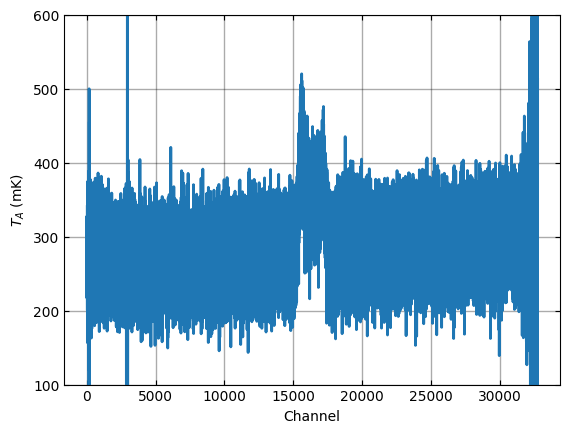

Stats : mean: 0.2708 K median: 0.2711 K rms: 0.0359 K min: 0.14 K max: 0.42 K
Expect: mean: 0.2708 K median: 0.2711 K rms: 0.0359 K min: 0.14 K max: 0.42 K


In [5]:
scan_block = sdfits.getps(ifnum=0, plnum=0)
ta = scan_block.timeaverage()
ta.plot(xaxis_unit="chan", yaxis_unit="mK", ymin=100, ymax=600, grid=True)

# Define a string for printing the spectrum statistics.
fmt_str = "mean: {mean:.4f} median: {median:.4f} rms: {rms:.4f} min: {min:.2f} max: {max:.2f}"
print(f"Stats : {fmt_str}".format(**ta[5000:14000].stats()))
print("Expect: mean: 0.2708 K median: 0.2711 K rms: 0.0359 K min: 0.14 K max: 0.42 K")

EXCLUDING [Spectral Region, 1 sub-regions:
  (1397351017.8085938 Hz, 1403454533.4335938 Hz) 
]


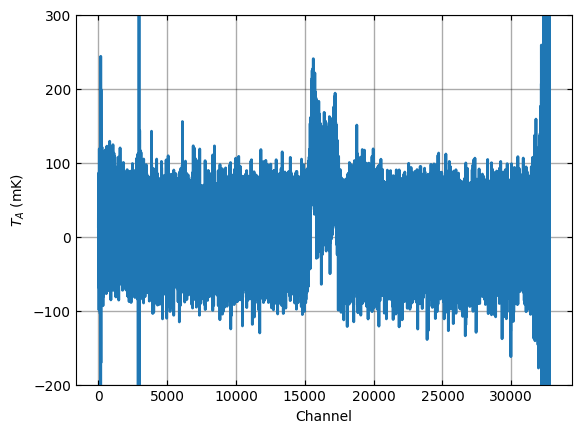

Stats : mean: 0.0005 K median: 0.0005 K rms: 0.0358 K min: -0.13 K max: 0.16 K
Expect: mean: 0.0005 K median: 0.0005 K rms: 0.0358 K min: -0.13 K max: 0.16 K


In [6]:
ta.baseline(model="poly", degree=1, exclude=[(14000,18000)], remove=True)
ta.plot(xaxis_unit="chan", yaxis_unit="mK", ymin=-200, ymax=300, grid=True)
print(f"Stats : {fmt_str}".format(**ta[5000:14000].stats()))
print("Expect: mean: 0.0005 K median: 0.0005 K rms: 0.0358 K min: -0.13 K max: 0.16 K")

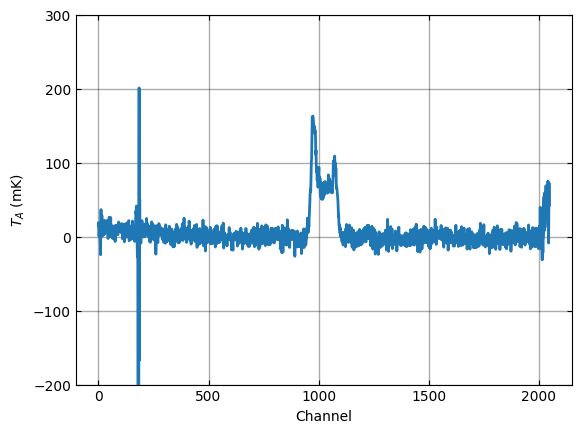

Stats : mean: 0.0005 K median: 0.0004 K rms: 0.0075 K min: -0.02 K max: 0.03 K
Expect: mean: 0.0005 K median: 0.0004 K rms: 0.0075 K min: -0.02 K max: 0.03 K


In [7]:
ts1 = ta.smooth('gaussian', 16)
ts1.plot(xaxis_unit="chan", yaxis_unit="mK", ymin=-200, ymax=300, grid=True)
print(f"Stats : {fmt_str}".format(**ts1[5000//16:14000//16].stats()))
print("Expect: mean: 0.0005 K median: 0.0004 K rms: 0.0075 K min: -0.02 K max: 0.03 K")

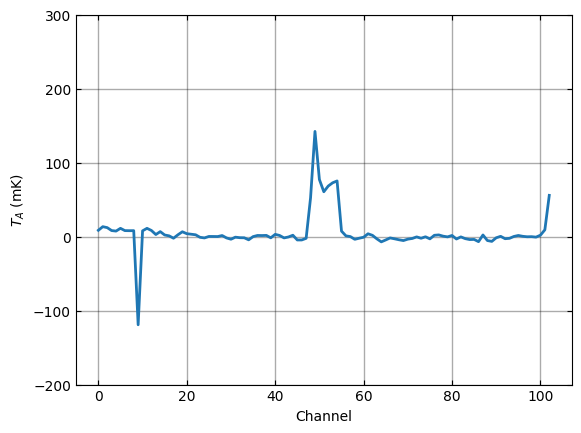

Stats : mean: 0.0006 K median: 0.0004 K rms: 0.0024 K min: -0.00 K max: 0.01 K


Rolled rms/rms ratio: 1.061789486991597


In [8]:
ts2 = ta.smooth('box', 320)
ts2.plot(xaxis_unit="chan", yaxis_unit="mK", ymin=-200, ymax=300, grid=True)

print(f"Stats : {fmt_str}".format(**ts2[5000//320:14000//320].stats()))
rratio = ts2[5000//320:14000//320].stats(roll=1)["rms"]/ts2[5000//320:14000//320].stats(roll=0)["rms"]
print(f"Rolled rms/rms ratio: {rratio}")

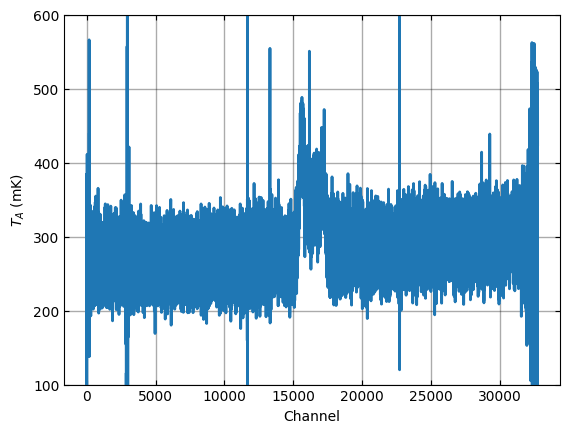

Stats : mean: 0.2694 K median: 0.2690 K rms: 0.0272 K min: 0.08 K max: 0.78 K
Expect: mean: 0.2694 K median: 0.2690 K rms: 0.0272 K min: 0.08 K max: 0.78 K


In [9]:
scan_block2 = sdfits.getps(ifnum=0, plnum=0, smoothref=31)
ta2 = scan_block2.timeaverage()
ta2.plot(xaxis_unit="chan", yaxis_unit="mK", ymin=100, ymax=600, grid=True)
print(f"Stats : {fmt_str}".format(**ta2[5000:14000].stats()))
print("Expect: mean: 0.2694 K median: 0.2690 K rms: 0.0272 K min: 0.08 K max: 0.78 K")

EXCLUDING [Spectral Region, 1 sub-regions:
  (1397351017.8085938 Hz, 1403454533.4335938 Hz) 
]


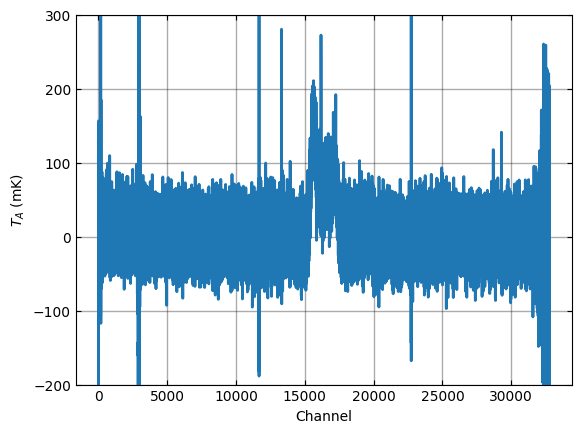

Stats : mean: 0.0009 K median: 0.0007 K rms: 0.0270 K min: -0.19 K max: 0.50 K
Expect: mean: 0.0009 K median: 0.0007 K rms: 0.0270 K min: -0.19 K max: 0.50 K


In [10]:
ta2.baseline(model="poly", degree=1, exclude=[(14000,18000)], remove=True)
ta2.plot(xaxis_unit="chan", yaxis_unit="mK", ymin=-200, ymax=300, grid=True)
print(f"Stats : {fmt_str}".format(**ta2[5000:14000].stats()))
print("Expect: mean: 0.0009 K median: 0.0007 K rms: 0.0270 K min: -0.19 K max: 0.50 K")

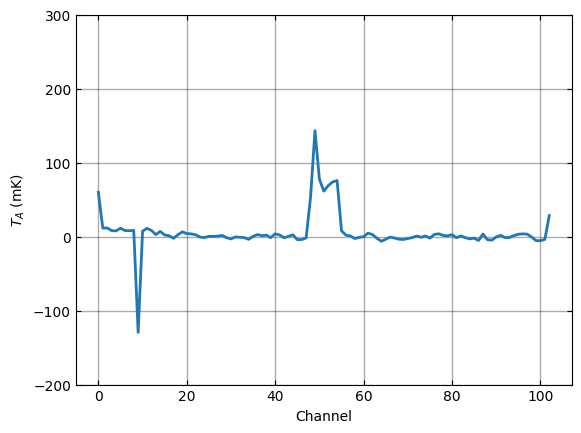

Stats : mean: 0.0009 K median: 0.0007 K rms: 0.0023 K min: -0.00 K max: 0.01 K


Rolled rms/rms ratio: 1.1034643963707769


In [11]:
ts3 = ta2.smooth('box', 320)
ts3.plot(xaxis_unit="chan", yaxis_unit="mK", ymin=-200, ymax=300, grid=True)
print(f"Stats : {fmt_str}".format(**ts3[5000//320:14000//320].stats()))
rratio = ts3[5000//320:14000//320].stats(roll=1)["rms"]/ts3[5000//320:14000//320].stats(roll=0)["rms"]
print(f"Rolled rms/rms ratio: {rratio}")

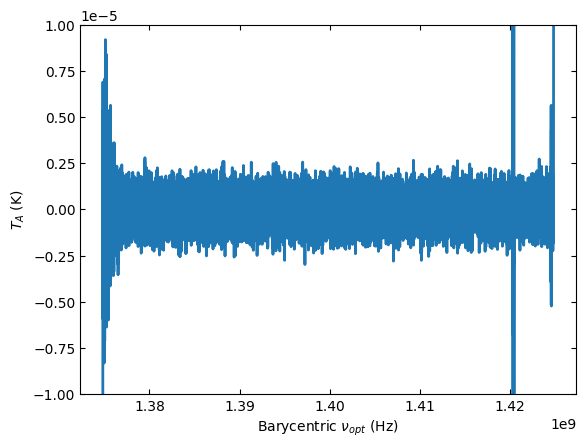

Stats : mean: -2.945e-10 K median: 4.285e-09 K rms: 7.291e-07 K min: -2.8e-06 K max: 2.7e-06 K


In [12]:
ts5a = ta.smooth('gaussian', width=3, decimate=-1).smooth('gaussian', width=5, decimate=-1)
ts5b = ta.smooth('gaussian', width=5, decimate=-1)
diff = ts5a-ts5b
diff.plot(ymin=-0.00001, ymax=0.00001)

fmt_str = "mean: {mean:.4g} median: {median:.4g} rms: {rms:.4g} min: {min:.2g} max: {max:.2g}"
print(f"Stats : {fmt_str}".format(**diff[5000:14000].stats()))